In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [65]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [66]:
from citipy import citipy

In [67]:
# Create a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combinaiton

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
# If the city is unique, then we will add it to the cities list

    if city not in cities:
        cities.append(city)
        
# Print th ecity count to confirm sufficient count

len(cities)

635

In [68]:
# Import the requests library

import requests

# Import the API key

from config import weather_api_key

In [69]:
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5195088b8504bbd0796aa4f556759d7d"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5195088b8504bbd0796aa4f556759d7d


In [70]:
# Import the datetime module from the datetime library

from datetime import datetime

In [71]:
# Create an empty list to hold the weather data

city_data =[]

# Print the beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list

for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city (for i, item in enumerate(list):)

    city_url = url + "&q=" + "i"

# Loop through all the cities in the list
    
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city

    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city

    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count

    record_count += 1
    
    # Run an API request for each of the cities
    
    try:
        
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | vila franca do campo
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | norman wells
Processing Record 4 of Set 13 | kargasok
Processing Record 5 of Set 13 | plettenberg bay
Processing Record 6 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 13 | cherskiy
Processing Record 8 of Set 13 | narsaq
Processing Record 9 of Set 13 | butaritari
Processing Record 10 of Set 13 | kailua
Processing Record 11 of Set 13 | carnarvon
Processing Record 12 of Set 13 | saint-philippe
Processing Record 13 of Set 13 | arraial do cabo
Processing Record 14 of Set 13 | luderitz
Processing Record 15 of Set 13 | umm kaddadah
Processing Record 16 of Set 13 | ushuaia
Processing Record 17 of Set 13 | rikitea
Processing Record 18 of Set 13 | new norfolk
Processing Record 19 of Set 13 | kyra
Processing Record 20 of Set 13 | ostrovnoy
Processing Record 21 of Set 13 | san crist

Processing Record 33 of Set 16 | the valley
Processing Record 34 of Set 16 | ilulissat
Processing Record 35 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 36 of Set 16 | katherine
Processing Record 37 of Set 16 | mareeba
Processing Record 38 of Set 16 | fortuna
Processing Record 39 of Set 16 | castro
Processing Record 40 of Set 16 | port alfred
Processing Record 41 of Set 16 | esperance
Processing Record 42 of Set 16 | pisco
Processing Record 43 of Set 16 | novopokrovka
Processing Record 44 of Set 16 | castlerea
Processing Record 45 of Set 16 | nguiu
City not found. Skipping...
Processing Record 46 of Set 16 | ahipara
Processing Record 47 of Set 16 | severo-kurilsk
Processing Record 48 of Set 16 | banda aceh
Processing Record 49 of Set 16 | porto santo
Processing Record 50 of Set 16 | aklavik
Processing Record 1 of Set 17 | sabang
Processing Record 2 of Set 17 | kundiawa
Processing Record 3 of Set 17 | riyadh
Processing Record 4 of Set 17 | alotau
City not foun

Processing Record 20 of Set 20 | kirakira
Processing Record 21 of Set 20 | haibowan
City not found. Skipping...
Processing Record 22 of Set 20 | fairbanks
Processing Record 23 of Set 20 | harwich
Processing Record 24 of Set 20 | hualmay
Processing Record 25 of Set 20 | flinders
Processing Record 26 of Set 20 | rawson
Processing Record 27 of Set 20 | sisimiut
Processing Record 28 of Set 20 | victor harbor
Processing Record 29 of Set 20 | labuan
Processing Record 30 of Set 20 | sao felix do xingu
Processing Record 31 of Set 20 | angoche
Processing Record 32 of Set 20 | roald
Processing Record 33 of Set 20 | vaitupu
City not found. Skipping...
Processing Record 34 of Set 20 | marawi
Processing Record 35 of Set 20 | ambon
Processing Record 36 of Set 20 | mahebourg
Processing Record 37 of Set 20 | bossangoa
Processing Record 38 of Set 20 | korla
Processing Record 39 of Set 20 | dharchula
Processing Record 40 of Set 20 | ucluelet
Processing Record 41 of Set 20 | sorvag
City not found. Skippi

Processing Record 7 of Set 24 | atasu
Processing Record 8 of Set 24 | katha
City not found. Skipping...
Processing Record 9 of Set 24 | kidal
Processing Record 10 of Set 24 | thai binh
Processing Record 11 of Set 24 | fare
Processing Record 12 of Set 24 | kontagora
Processing Record 13 of Set 24 | ternate
Processing Record 14 of Set 24 | galesong
Processing Record 15 of Set 24 | biak
Processing Record 16 of Set 24 | biltine
Processing Record 17 of Set 24 | sento se
City not found. Skipping...
Processing Record 18 of Set 24 | kjopsvik
Processing Record 19 of Set 24 | chernyshevskiy
Processing Record 20 of Set 24 | alexandria
Processing Record 21 of Set 24 | vagay
Processing Record 22 of Set 24 | butajira
Processing Record 23 of Set 24 | russell
Processing Record 24 of Set 24 | saint-francois
Processing Record 25 of Set 24 | goure
Processing Record 26 of Set 24 | laguna
Processing Record 27 of Set 24 | pombas
Processing Record 28 of Set 24 | buala
Processing Record 29 of Set 24 | alappuz

In [79]:
len(city_data)

589

In [80]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Franca Do Campo,37.72,-25.43,62.60,93,40,8.05,PT,2020-05-07 01:45:35
1,Mataura,-46.19,168.86,55.33,80,95,8.99,NZ,2020-05-07 01:45:35
2,Norman Wells,65.28,-126.83,44.60,56,20,16.11,CA,2020-05-07 01:45:35
3,Kargasok,59.06,80.86,49.95,68,0,16.35,RU,2020-05-07 01:45:35
4,Plettenberg Bay,-34.05,23.37,61.65,70,8,3.31,ZA,2020-05-07 01:45:36
5,Cherskiy,68.75,161.30,34.39,87,100,6.11,RU,2020-05-07 01:45:36
6,Narsaq,60.92,-46.05,42.80,75,67,5.82,GL,2020-05-07 01:45:36
7,Butaritari,3.07,172.79,83.80,77,61,10.22,KI,2020-05-07 01:45:36
8,Kailua,21.40,-157.74,86.00,51,20,12.75,US,2020-05-07 01:45:36
9,Carnarvon,-24.87,113.63,64.96,51,0,19.75,AU,2020-05-07 01:45:36


In [81]:
# Re-arrange columns, put back into dataframe

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [82]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila Franca Do Campo,PT,2020-05-07 01:45:35,37.72,-25.43,62.60,93,40,8.05
1,Mataura,NZ,2020-05-07 01:45:35,-46.19,168.86,55.33,80,95,8.99
2,Norman Wells,CA,2020-05-07 01:45:35,65.28,-126.83,44.60,56,20,16.11
3,Kargasok,RU,2020-05-07 01:45:35,59.06,80.86,49.95,68,0,16.35
4,Plettenberg Bay,ZA,2020-05-07 01:45:36,-34.05,23.37,61.65,70,8,3.31
...,...,...,...,...,...,...,...,...,...
584,Morant Bay,JM,2020-05-07 01:47:17,17.88,-76.41,84.20,74,75,17.22
585,Ben Tre,VN,2020-05-07 01:47:17,10.23,106.38,90.52,59,32,4.81
586,Dunedin,NZ,2020-05-07 01:47:17,-45.87,170.50,58.77,61,99,9.55
587,Seddon,AU,2020-05-07 01:47:18,-37.81,144.89,70.00,55,84,23.04


In [83]:
# Create the output file(CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [93]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

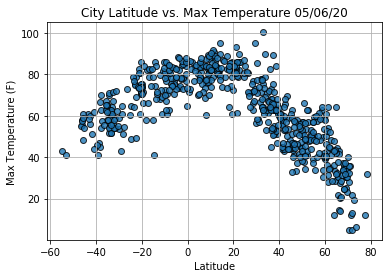

In [94]:
# Build the scatter plot for latitude vs. max temperature

import matplotlib.pyplot as plt
import time

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()

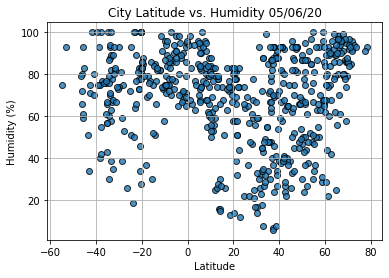

In [95]:
# Build the scatter plot for latitude vs. humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot

plt.show()

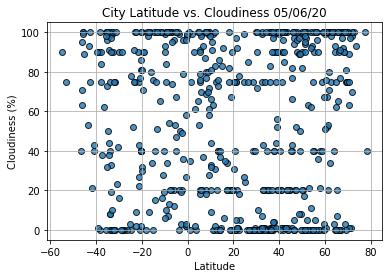

In [96]:
# Build the scatter plot for latitude vs. cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot

plt.show()

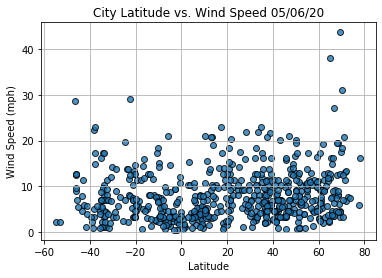

In [97]:
# Build the scatter plot for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot

plt.show()

In [98]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x = " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line 
    plt.scattet(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [99]:
index13 = city_data_df.loc[13]
index13

City                 Umm Kaddadah
Country                        SD
Date          2020-05-07 01:45:37
Lat                          13.6
Lng                         26.69
Max Temp                    81.91
Humidity                       16
Cloudiness                     86
Wind Speed                  19.01
Name: 13, dtype: object

In [100]:
# Get all Northern Hemisphere latitudes

city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
584     True
585     True
586    False
587    False
588     True
Name: Lat, Length: 589, dtype: bool

In [101]:
# Locate all Northern Hemisphere latitudes

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila Franca Do Campo,PT,2020-05-07 01:45:35,37.72,-25.43,62.60,93,40,8.05
2,Norman Wells,CA,2020-05-07 01:45:35,65.28,-126.83,44.60,56,20,16.11
3,Kargasok,RU,2020-05-07 01:45:35,59.06,80.86,49.95,68,0,16.35
5,Cherskiy,RU,2020-05-07 01:45:36,68.75,161.30,34.39,87,100,6.11
6,Narsaq,GL,2020-05-07 01:45:36,60.92,-46.05,42.80,75,67,5.82


In [105]:
# Create DataFrames for all Northern and Southern Hemisphere latitudes

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [ ]:
(slope, intercept, rval, pval, stderr) = linregress(daylight, temps)

In [128]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Call the function.
def plot_linear_regression(x_values, y_values,title, 'Max Temp', (10,40)):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

SyntaxError: invalid syntax (<ipython-input-128-83e84c20a710>, line 7)